<a href="https://colab.research.google.com/github/jwookkim0512/machinelearning-assignments/blob/main/9weekassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

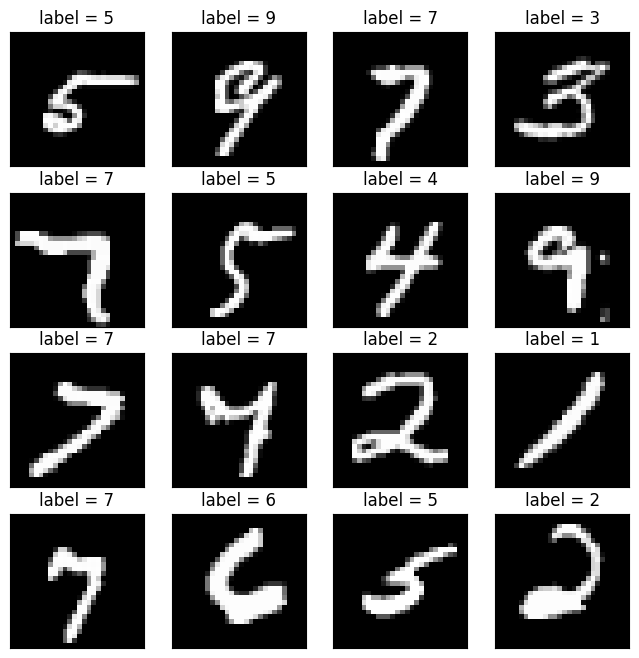

In [69]:
import numpy as np              # 넘파이 (행렬 계산 등)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # 데이터 분리용
from sklearn.metrics import accuracy_score  # 정확도 계산용
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀용

train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test.csv')


x_test = test.values
x_train, x_val,y_train,y_val = train_test_split(
train.values[:,1:], train.values[:,0], test_size=0.2)


fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j  # 각 이미지 인덱스
        ax[i, j].imshow(x_train[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label = %s' % y_train[idx])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])


In [70]:

clf = LogisticRegression(
    C=1.0,                    # 규제 강도 (작을수록 규제 강함, 과적합 방지)
    class_weight=None,       # 클래스별 가중치 (불균형 데이터에 사용 가능)
    dual=False,              # 이중 형태(SVM-style dual problem) 사용 여부 (보통 False)
    fit_intercept=True,      # 절편 항을 학습할지 여부
    intercept_scaling=1,     # 'liblinear' solver에서만 사용되는 절편 스케일
    l1_ratio=None,           # 엘라스틱넷 규제 혼합 비율 (L1:L2)
    max_iter=100,            # 최대 반복 횟수 (수렴할 때까지 반복)
    multi_class='multinomial',  # 다중 클래스 처리 방식 ('ovr' 또는 'multinomial')
    n_jobs=None,             # 병렬 처리 수 (None이면 1)
    penalty='l2',            # 규제 종류 ('l1', 'l2', 'elasticnet', 'none')
    random_state=None,       # 랜덤 시드 (재현성을 위한 값)
    solver='lbfgs',          # 최적화 알고리즘 ('liblinear', 'lbfgs', 'saga' 등)
    tol=0.001,               # 수렴 허용 오차 (작을수록 정확하게 반복)
    verbose=0,               # 출력 로그 수준 (0이면 안 보임)
    warm_start=False         # 이전 학습 결과를 이어서 계속할지 여부
)


In [71]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

In [72]:
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f"%(accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.916


Correctly predicted images:


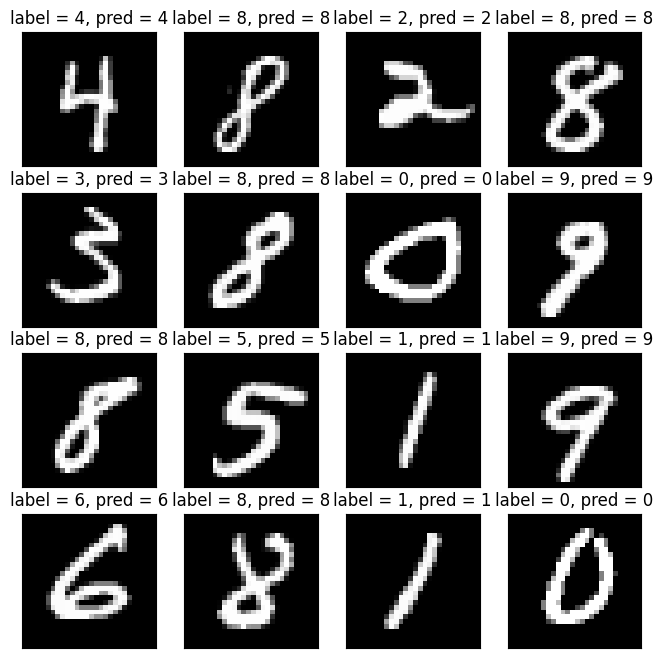

In [52]:
print("Correctly predicted images:")
x_val_correct = x_val[y_val == y_val_pred, :]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label = %s, pred = %s' % (y_val_correct[idx], y_val_pred_correct[idx]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])


incorrectly predicted images :


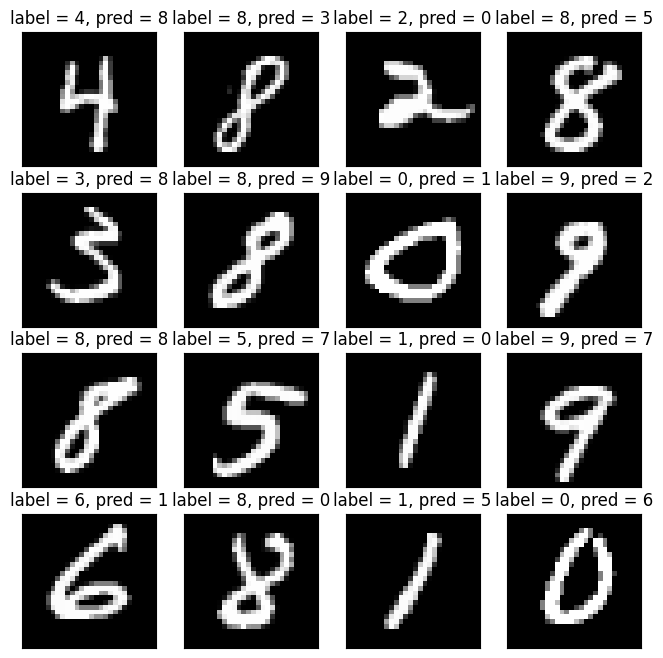

In [54]:
print("incorrectly predicted images :")
x_val_incorrect = x_val[y_val != y_val_pred, :]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label = %s, pred = %s' % (y_val_correct[idx], y_val_pred_incorrect[idx]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])


In [59]:
preds = clf.predict(x_test)

In [66]:

sample_submission = pd.read_csv("/content/sample_submission (1).csv")  # 템플릿 파일 불러오기
sample_submission['Label'] = preds  # 예측 결과 넣기

sample_submission.to_csv("/content/sample_submission (1).csv", index=False)  # 새 이름으로 저장

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
